In [4]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import pickle

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

In [11]:
# Read in the Data
df = pd.read_csv('Morticd9.csv', dtype={'2':np.int32})

In [12]:
df.head(10)

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,2005,nan,NaN,1983,09A,B00,1,1,1,36,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,0.000,2.000,1.000,0.000,0.000,1.000,4.000,3.000,11.000,5.000,4.000,nan,nan,1.000,0.000,0.000,0.000,0.000
1,2005,nan,NaN,1983,09A,B00,2,1,1,37,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,3.000,1.000,2.000,1.000,0.000,2.000,2.000,5.000,2.000,5.000,10.000,nan,nan,0.000,0.000,0.000,1.000,0.000
2,2005,nan,NaN,1983,09A,B01,1,1,1,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,nan,0.000,0.000,0.000,0.000,0.000
3,2005,nan,NaN,1983,09A,B01,2,1,1,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,nan,0.000,0.000,0.000,0.000,0.000
4,2005,nan,NaN,1983,09A,B010,1,1,1,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,nan,0.000,0.000,0.000,0.000,0.000
5,2005,nan,NaN,1983,09A,B010,2,1,1,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,nan,0.000,0.000,0.000,0.000,0.000
6,2005,nan,NaN,1983,09A,B011,1,1,1,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,nan,0.000,0.000,0.000,0.000,0.000
7,2005,nan,NaN,1983,09A,B011,2,1,1,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,nan,0.000,0.000,0.000,0.000,0.000
8,2005,nan,NaN,1983,09A,B012,1,1,1,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,nan,0.000,0.000,0.000,0.000,0.000
9,2005,nan,NaN,1983,09A,B012,2,1,1,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,nan,0.000,0.000,0.000,0.000,0.000


In [13]:
df.tail(10)

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
899460,3068,nan,A51,2000,09C,C099,1,2,8,87,0.000,1.000,nan,nan,nan,1.000,2.000,3.000,5.000,7.000,7.000,14.000,13.000,15.000,8.000,3.000,2.000,3.000,2.000,1.000,0.000,0.000,nan,nan,0.000,0.000,nan,nan,nan
899461,3068,nan,A51,2000,09C,C099,2,2,8,32,0.000,0.000,nan,nan,nan,0.000,1.000,0.000,3.000,1.000,3.000,5.000,5.000,3.000,2.000,4.000,1.000,3.000,1.000,0.000,0.000,0.000,nan,nan,0.000,0.000,nan,nan,nan
899462,3068,nan,A51,2000,09C,C100,1,2,8,236,0.000,1.000,nan,nan,nan,5.000,4.000,11.000,21.000,25.000,33.000,37.000,32.000,25.000,12.000,13.000,5.000,4.000,4.000,3.000,1.000,0.000,nan,nan,0.000,0.000,nan,nan,nan
899463,3068,nan,A51,2000,09C,C100,2,2,8,38,0.000,0.000,nan,nan,nan,2.000,5.000,0.000,0.000,2.000,1.000,4.000,4.000,4.000,6.000,3.000,0.000,5.000,2.000,0.000,0.000,0.000,nan,nan,0.000,0.000,nan,nan,nan
899464,3068,nan,A51,2000,09C,C101,1,2,8,1106,17.000,28.000,nan,nan,nan,20.000,15.000,24.000,85.000,106.000,96.000,126.000,79.000,82.000,47.000,26.000,37.000,44.000,57.000,71.000,80.000,66.000,nan,nan,0.000,17.000,nan,nan,nan
899465,3068,nan,A51,2000,09C,C101,2,2,8,892,14.000,22.000,nan,nan,nan,16.000,8.000,12.000,10.000,21.000,17.000,23.000,27.000,25.000,23.000,9.000,26.000,49.000,59.000,89.000,162.000,280.000,nan,nan,0.000,14.000,nan,nan,nan
899466,3068,nan,A51,2000,09C,C102,1,2,8,2005,0.000,0.000,nan,nan,nan,2.000,24.000,52.000,111.000,150.000,165.000,188.000,219.000,187.000,143.000,112.000,125.000,150.000,146.000,118.000,76.000,37.000,nan,nan,0.000,0.000,nan,nan,nan
899467,3068,nan,A51,2000,09C,C102,2,2,8,1850,0.000,0.000,nan,nan,nan,2.000,12.000,43.000,112.000,156.000,175.000,164.000,146.000,157.000,127.000,95.000,110.000,139.000,133.000,134.000,83.000,62.000,nan,nan,0.000,0.000,nan,nan,nan
899468,3068,nan,A51,2000,09C,C103,1,2,8,957,3.000,6.000,nan,nan,nan,7.000,11.000,57.000,92.000,107.000,143.000,159.000,119.000,96.000,47.000,26.000,20.000,27.000,16.000,9.000,8.000,4.000,nan,nan,0.000,3.000,nan,nan,nan
899469,3068,nan,A51,2000,09C,C103,2,2,8,376,0.000,2.000,nan,nan,nan,6.000,10.000,24.000,43.000,31.000,63.000,45.000,45.000,25.000,21.000,10.000,15.000,15.000,9.000,6.000,3.000,3.000,nan,nan,0.000,0.000,nan,nan,nan


In [14]:
df.dtypes[df.dtypes == 'object']

SubDiv    object
List      object
Cause     object
dtype: object

In [15]:
df.describe()

,Country,Admin1,Year,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,Deaths9,Deaths10,Deaths11,Deaths12,Deaths13,Deaths14,Deaths15,Deaths16,Deaths17,Deaths18,Deaths19,Deaths20,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
count,899470.000,6720.000,899470.000,899470.000,899470.000,899470.000,899470.000,894349.000,894349.000,802055.000,802055.000,802055.000,894349.000,891013.000,894349.000,891013.000,894349.000,891013.000,894349.000,891013.000,894349.000,891013.000,894349.000,891013.000,894349.000,891013.000,891327.000,878851.000,878851.000,54143.000,54143.000,894349.000,894349.000,699838.000,716620.000,716620.000
mean,3482.350,901.500,1989.851,1.517,1.137,2.447,1206.890,45.342,9.034,2.279,1.459,1.142,5.246,4.479,9.260,13.483,15.309,18.346,21.973,28.327,37.761,52.334,72.189,93.985,115.599,144.232,165.669,163.162,195.910,13.298,5.163,2.340,25.723,6.444,3.970,14.222
std,980.170,0.500,6.551,0.520,0.862,2.823,15799.201,759.859,176.914,37.943,22.739,17.309,75.695,62.691,148.576,237.218,277.108,327.472,369.374,460.231,592.441,800.124,1099.579,1343.922,1585.593,1994.384,2352.920,2361.036,3039.213,163.099,66.862,58.719,515.550,149.124,84.847,335.568
min,1125.000,901.000,1979.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2400.000,901.000,1985.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,4030.000,901.500,1990.000,2.000,1.000,1.000,9.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,4210.000,902.000,1994.000,2.000,1.000,1.000,126.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,2.000,2.000,3.000,3.000,4.000,6.000,7.000,9.000,10.000,10.000,8.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,5195.000,902.000,2013.000,9.000,9.000,9.000,1522769.000,102206.000,30297.000,5623.000,2889.000,2152.000,9283.000,7447.000,15547.000,32658.000,40787.000,48415.000,67043.000,85874.000,107142.000,133315.000,164223.000,205055.000,170747.000,219301.000,270952.000,267051.000,413518.000,7637.000,3528.000,14536.000,82086.000,17908.000,15777.000,57238.000


In [16]:
df.describe(include=['object'])

,SubDiv,List,Cause
count,15696,899470,899470
unique,7,4,532
top,A20,09B,B00
freq,4412,638778,3552


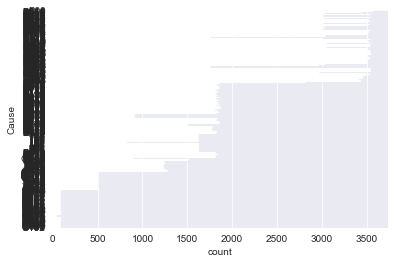

In [19]:
sns.countplot(y='Cause', data=df)
plt.show()